In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.mlab as mlab
from scipy.stats import norm

In [2]:
#first data
file='gaia.csv'
data = ascii.read(file,format='csv')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


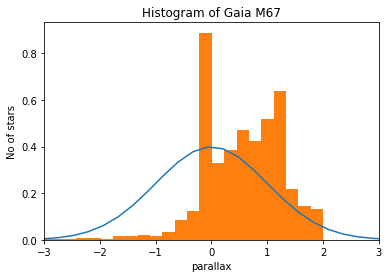

In [3]:
#making a histogram and first sorting using gausian fit
parallax = (data['parallax'])

plt.xlim (-3, 3)
plt.ylabel('No of stars')
plt.xlabel('parallax')
mean = np.mean(parallax)
variance = np.var(parallax)
sigma = np.sqrt(variance)
a = np.linspace(min(parallax), max(parallax), 100)
          
plt.plot(a, norm.pdf(a))#, *args))
mask = np.where(data['parallax'] < 2.0)

data[mask]
ascii.write(data,'/home/ibik/data_masked.csv')
plt.hist(parallax[mask], normed =True, bins =30)   
plt.title('Histogram of Gaia M67')
#plt.show()
plt.savefig('histgaia.pdf')

In [3]:
# 2nd selection process according to proper motion
file='data_masked.csv'
data = ascii.read(file,format='csv')
#mask =np.where(data['pmra'] < -48.0)
within_reg =np.where((data['pmdec'] < 25.0) & (data['pmra'] > -48.0))
data_i_want = data[within_reg]
ascii.write(data_i_want,'/home/ibik/datapmra_masked.csv', overwrite=True)

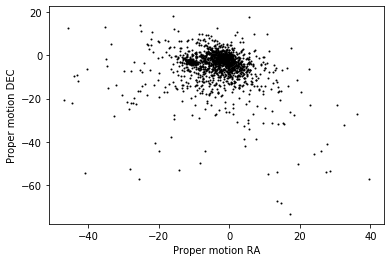

In [15]:
#final proper motion diagram after removing scatters
file='datapmra_masked.csv'
data = ascii.read(file,format='csv')
pmra = (data['pmra'])
xerr = (data['pmra_error'])
yerr = (data['pmdec_error'])
pmdec = (data['pmdec'])
#plt.errorbar(pmra,pmdec,xerr, yerr,'k.', markersize=2,)
plt.plot(pmra,pmdec,'k.', markersize=2,)

plt.ylabel('Proper motion DEC')
plt.xlabel('Proper motion RA')
plt.title('Proper motion for Gaia M67')
#plt.xlim(-50,50)
#plt.ylim(-50,50)
plt.savefig('propgaia.pdf')
plt.show()

In [2]:
#screening out points with no values of Luminosity and teff
file='datapmra_masked.csv'
data = ascii.read(file,format='csv')
#mask =np.where(data['pmra'] < -48.0)
within_reg =np.where((data['teff_val'] > 0) & (data['lum_val'] > 0))
data_i_want = data[within_reg]
ascii.write(data_i_want,'/home/ibik/datalteff.csv', overwrite=True)

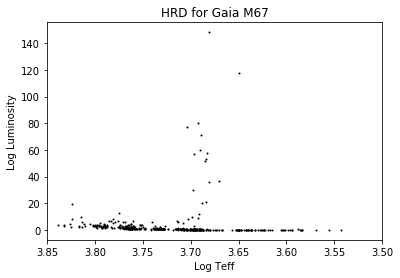

In [19]:
#HR plot
file='datalteff.csv'
data = ascii.read(file,format='csv')#

luminosity =(data['lum_val'])
teff = (data['logteff'])
plt.plot(teff,luminosity,'k.', markersize=2,)
plt.xlim(3.85,3.50)
#plt.ylim(0,20)
plt.ylabel('Log Luminosity')
plt.xlabel('Log Teff')
plt.title('HRD for Gaia M67')
plt.savefig('lteff.pdf')
plt.show()

In [10]:
#screening out points with no values of the absolute magnitudes and Bp-Rp_corrected
file='datapmra_masked.csv'
data = ascii.read(file,format='csv')
#mask =np.where(data['pmra'] < -48.0)
within_reg =np.where((data['m'] !='#VALUE!') & (data['bp_rp_t'] != '#VALUE!'))
data_i_want = data[within_reg]
ascii.write(data_i_want,'/home/ibik/datambp.csv', overwrite=True)

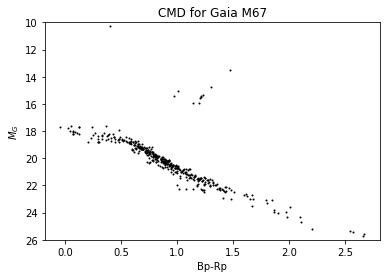

In [13]:
#plot CMD
file='datambp.csv'
data = ascii.read(file,format='csv')#

absmag =(data['m'])
bp= (data['bp_rp_t'])
plt.plot(bp,absmag,'k.', markersize=2,)
#plt.xlim(3.85,3.50)
plt.ylim(26,10)
plt.ylabel('$M_{G}$')
plt.xlabel('Bp-Rp')
plt.title('CMD for Gaia M67')
plt.savefig('cmd.pdf')
plt.show()

**For the MESA plot**

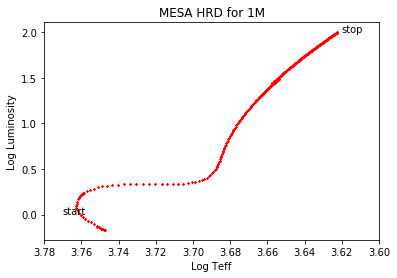

In [14]:
#MESA HR plot
file='mesassign.csv'
mydata = ascii.read(file,format='csv')#

luminosity =(mydata['logL'])
Teff= (mydata['logTeff'])
plt.plot(Teff,luminosity,'r*', markersize=2,)
plt.xlim(3.78,3.60)
#plt.ylim(26,10)
plt.ylabel('Log Luminosity')
plt.xlabel('Log Teff')
plt.text(3.77,0,'start')
plt.text(3.62,2,'stop')
plt.title('MESA HRD for 1M')
plt.savefig('mesahr.pdf')
plt.show()

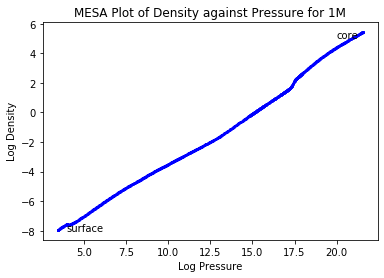

In [12]:
#MESA density - Pressure plot
file='mesassign.csv'
mydata = ascii.read(file,format='csv')#

density=(mydata['logd'])
pressure = (mydata['logP'])
plt.plot(pressure,density,'b*', markersize=2,)
#plt.xlim(3.78,3.60)
#plt.ylim(26,10)
plt.ylabel('Log Density')
plt.xlabel('Log Pressure')
plt.text(4,-8,'surface')
plt.text(20,5,'core')
plt.title('MESA Plot of Density against Pressure for 1M')
plt.savefig('mesadensity.pdf')
plt.show()

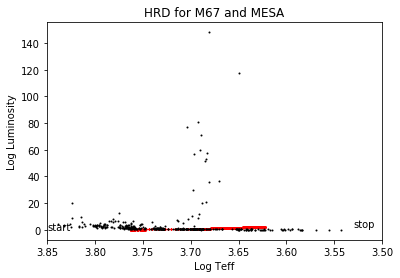

In [20]:
file='mesassign.csv'
mydata = ascii.read(file,format='csv')#
luminosity =(mydata['logL'])
Teff= (mydata['logTeff'])

file='datalteff.csv'
data = ascii.read(file,format='csv')#
lum =(data['lum_val'])
teff = (data['logteff'])

plt.plot(Teff,luminosity,'r*', markersize=2,)
plt.plot(teff,lum,'k.', markersize=2,)

plt.xlim(3.85,3.50)
#plt.ylim(26,10)
plt.ylabel('Log Luminosity')
plt.xlabel('Log Teff')
plt.text(3.85,0,'start')
plt.text(3.53,2,'stop')
plt.title('HRD for M67 and MESA')
plt.savefig('jointhrd.pdf')
plt.show()